In [1]:
# for analysis
import pandas as pd
import numpy as np
import os
# from scipy.optimize import curve_fit
import scipy.stats as stats
import matplotlib.pyplot as plt
from getCitiBikeCSV import getCitiBikeCSV
%pylab inline
plt.style.use('ggplot')

# for reverse geocoding routine
import urllib, json
import csv

# relevant system environment vars
data = os.getenv('PUIDATA')

Populating the interactive namespace from numpy and matplotlib


In [2]:
datestring = '201607'
datestring1 = '201608'
getCitiBikeCSV(datestring)
getCitiBikeCSV(datestring1)

('Downloading', '201607')
file in place, you can continue
('Downloading', '201608')
file in place, you can continue


In [3]:
july16 =pd.read_csv(data + "/" + datestring + '-citibike-tripdata.csv')
aug16 = pd.read_csv(data + "/" + datestring1 + '-citibike-tripdata.csv')
july16.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,704,7/1/2016 00:00:02,7/1/2016 00:11:47,459,W 20 St & 11 Ave,40.746745,-74.007756,347,Greenwich St & W Houston St,40.728846,-74.008591,17431,Customer,NaN,0
1,492,7/1/2016 00:00:18,7/1/2016 00:08:31,293,Lafayette St & E 8 St,40.730287,-73.990765,466,W 25 St & 6 Ave,40.743954,-73.991449,24159,Subscriber,1984.0,1
2,191,7/1/2016 00:00:19,7/1/2016 00:03:31,3090,N 8 St & Driggs Ave,40.717746,-73.956001,3107,Bedford Ave & Nassau Ave,40.723117,-73.952123,16345,Subscriber,1986.0,2
3,687,7/1/2016 00:00:24,7/1/2016 00:11:52,459,W 20 St & 11 Ave,40.746745,-74.007756,347,Greenwich St & W Houston St,40.728846,-74.008591,25210,Customer,NaN,0
4,609,7/1/2016 00:00:31,7/1/2016 00:10:40,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,212,W 16 St & The High Line,40.743349,-74.006818,15514,Customer,NaN,0


In [4]:
df= pd.concat([july16, aug16])

In [5]:
df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')

In [6]:
df.drop([u'tripduration', u'starttime', u'stoptime',u'start station id',u'start station latitude',u'start station longitude',
       u'start station name', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'gender'], axis=1, inplace=True)

In [7]:
print("length of df : ",len(df))
df.head()

('length of df : ', 2937773)


,birth year
0,NaN
1,1984.0
2,1986.0
3,NaN
4,NaN


In [8]:
df['age'] = 2016 - df['birth year']

In [9]:
df.dropna(inplace = True)
print("length of df : ",len(df))
df.head()

('length of df : ', 2519554)


,birth year,age
1,1984.0,32.0
2,1986.0,30.0
5,1991.0,25.0
6,1989.0,27.0
7,1989.0,27.0


In [10]:
df1 = df[df['age'] < 100]
print("length of df : ",len(df))
print("maximum age : ", df1.age.max())
print("mean :", df1.age.mean())
print("standard_deviation =  ",df1.age.std())

('length of df : ', 2519554)
('maximum age : ', 99.0)
('mean :', 37.628963625628785)
('standard_deviation =  ', 11.413703320053111)


('Fitted mean = ', 34.02373340851986)
('Fitted standard deviation = ', 10.429307331791792)


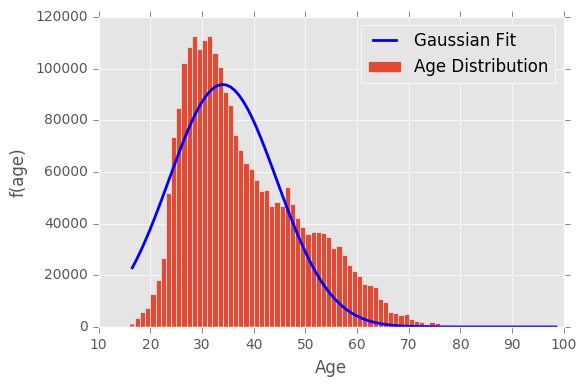

In [11]:
import pylab as py
# import numpy as np
from scipy import optimize


data = plt.hist(df1.age,  bins = np.arange(df1.age.min(), df1.age.max() + 1, 1), label = "Age Distribution")

# Equation for Gaussian
def f(x, a, mu, sigma):
    return a * py.exp(-(x - mu)**2.0 / (2 * sigma**2))

# Generate data from bins as a set of points 
x = [0.5 * (data[1][i] + data[1][i+1]) for i in xrange(len(data[1])-1)]
y = data[0]

# p0 is the initial guess for the fitting coefficients (A, mu and sigma above)
p0 = [60000, 38, 12]
coef, covv = optimize.curve_fit(f, x, y, p0)

x_fit = np.linspace(x[0], x[-1], 100)
y_fit = f(x_fit, *coef)

plt.plot(x_fit, y_fit, lw=2, color="b", label = 'Gaussian Fit')
plt.xlabel('Age')
plt.ylabel('f(age)')
plt.legend()
print ('Fitted mean = ', coef[1])
print ('Fitted standard deviation = ', coef[2])

# Test1: Kolmogorov-Smirnov (KS) Test

### Null Hypothesis : $H_0$  
The normalised Age distribution of Citibike Drivers is similar to Standar Normal Distribution with mean =0 and standard devaition = 1. 

Here we set aplha -> (Î± = 0.05)

### first we are Normalizing Data in order to apply KS Test

In [12]:
normalisedAge = (df1['age'] - coef[1]) / coef[2]
print(stats.kstest(df1['age'], 'norm'))
print(stats.kstest(normalisedAge, 'norm'))

KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=0.12194789201964717, pvalue=0.0)


### p value is less than 0.05 i.e signifinace level. Hence we can reject the null hypothesis.

# Test2 : Anderson-Darling (AD) Test

 ### Null Hypothesis : $H_0$ 
 The normalised Age distribution of Citibike Drivers is similar to Standar Normal Distribution with mean =0 and standard devaition = 1. 
Here we set aplha -> (Î± = 0.05)

In [13]:
print(stats.anderson(normalisedAge, 'norm'))

AndersonResult(statistic=47391.878020175733, critical_values=array([ 0.576,  0.656,  0.787,  0.918,  1.092]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


### At 5% significance level, the critical value is 0.787 which is very very small with our AD statistic. So again we reject the null hypothesis that citibike age distribution of drivers is similar to standard normal distribution.

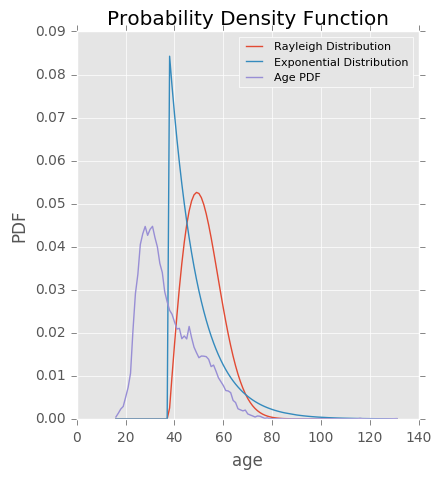

In [27]:
df_age = df['age'].groupby(df.age).agg([np.count_nonzero])
df_age_N = df_age.cumsum()/df_age.cumsum().max()

diff = np.abs(df_age_N.count_nonzero - stats.rayleigh.cdf(df_age.index.values, loc=df.age.mean(), scale=df.age.std()))

fig = plt.figure(figsize=(15,5))

# PDF
ax1 = fig.add_subplot(131)
ax1.plot(df_age.index.values, stats.rayleigh.pdf(df_age.index.values, loc=df.age.mean(), 
                                                 scale=df.age.std()),
                                                 label="Rayleigh Distribution")
ax1.plot(df_age.index.values, stats.expon.pdf(df_age.index.values, loc=df.age.mean(), 
                                                 scale=df.age.std()),
                                                 label="Exponential Distribution")
ax1.plot(df_age.index.values, df_age/df_age.sum(), label="Age PDF")
plt.title('Probability Density Function')
plt.legend(loc = 'best', fontsize = 8)
plt.xlabel('age')
plt.ylabel('PDF')

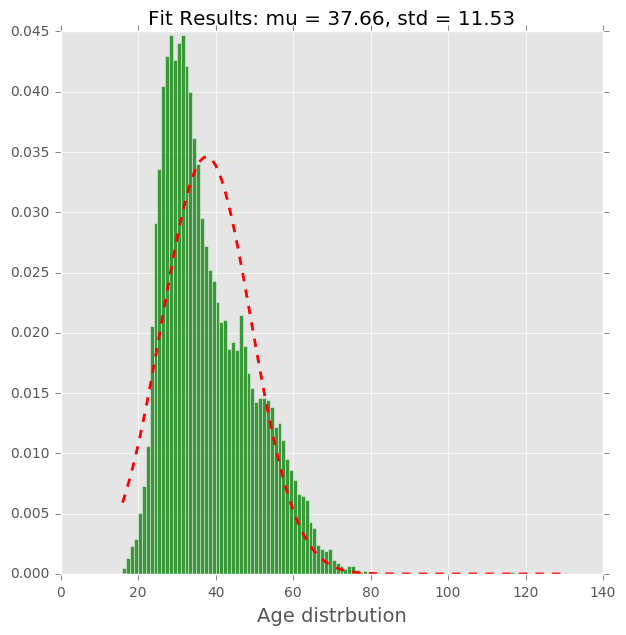

In [25]:

bins = np.arange(min(df['age']), max(df['age']) + 1, 1)
(mu, sigma) = stats.norm.fit(df.age)
plt.figure(figsize= (7,7))

n, bins, patches = plt.hist(df.age, bins, normed=True, facecolor='green', alpha=0.75, )
# ax = df.age.groupby(pd.cut(df.age, bins)).agg([count_nonzero]).plot(kind='bar', legend=False)

y = mlab.normpdf(bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=2)
plt.title("Fit Results: mu = %0.2f, std = %0.2f"  % (mu, sigma))
plt.xlabel('Age distrbution', fontsize = 14)
# pl.ylim(0,15000)
plt.show()
# plt.ylabel('Probablity', fontsize = 14)
# print("fimu,sigma)

# Test1: Kolmogorov-Smirnov (KS) Test

### Null Hypothesis : $H_0$  
The normalised Age distribution of Citibike Drivers is similar to Rayleigh Distribution. 

Here we set aplha -> (Î± = 0.05)

In [30]:
stats.kstest(df.age, stats.rayleigh.cdf, args=(df.age.mean(), df_age.std()))

KstestResult(statistic=0.99999643458454557, pvalue=0.0)

### p value is less than 0.05 i.e signifinace level. Hence we can reject the null hypothesis.

# Test2 : Anderson-Darling (AD) Test

 ### Null Hypothesis : $H_0$ 
 The normalised Age distribution of Citibike Drivers is similar to a particular Distribution.
 
Here we set aplha -> (Î± = 0.05)

In [28]:
stats.anderson(df.age, dist='expon')

AndersonResult(statistic=583605.21179185621, critical_values=array([ 0.922,  1.078,  1.341,  1.606,  1.957]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

The critical value obtained at the 5% significance level is 1.341 and the AD Statistic obtained is greater than the critical value, so as per the AD test description, we can reject the null hypothesis

The age distribution of citibike riders is not taken from the exponential distribution.